In [61]:
from google.colab import files
uploaded = files.upload()


Saving Netflix Dataset.csv to Netflix Dataset (1).csv


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot style
sns.set(style="whitegrid")


In [63]:
# Replace the filename with your uploaded file name if different
df = pd.read_csv("Netflix Dataset.csv")

# Quick look at the data
df.head()

# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [64]:
df.columns


Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [65]:
# Drop duplicates
df = df.drop_duplicates()

# Fill missing values safely
if 'Director' in df.columns:
    df['Director'] = df['Director'].fillna('Unknown')
if 'Cast' in df.columns:
    df['Cast'] = df['Cast'].fillna('Unknown')
if 'Country' in df.columns:
    df['Country'] = df['Country'].fillna('Unknown')
if 'Rating' in df.columns:
    df['Rating'] = df['Rating'].fillna('Not Rated')

# Convert Release_Date to datetime safely
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['year_added'] = df['Release_Date'].dt.year


/tmp/ipython-input-3245742118.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




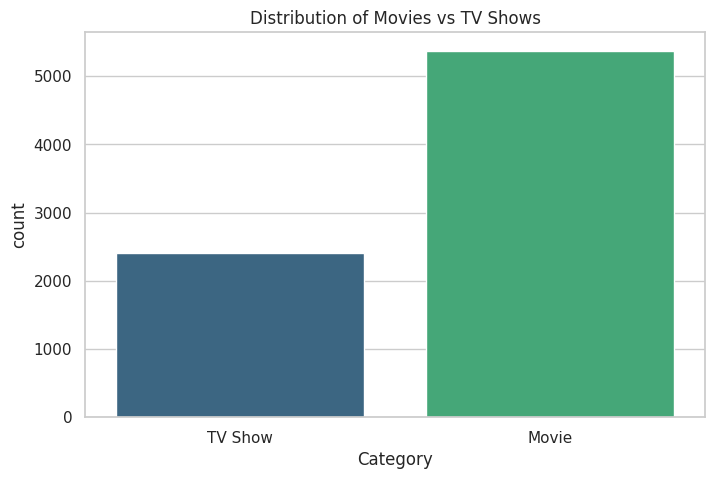

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Category', palette='viridis')
plt.title("Distribution of Movies vs TV Shows")
plt.show()


In [67]:
df['Release_Date'].head()
df['year_added'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
df['year_added'].unique()


array([2020., 2016., 2018., 2017., 2019., 2021., 2015., 2013., 2011.,
         nan, 2012., 2014., 2008., 2009., 2010.])

In [68]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce', dayfirst=True)
df['year_added'] = df['Release_Date'].dt.year

# Check if year_added exists
print(df['year_added'].head())


0    2020.0
1    2016.0
2    2018.0
3    2017.0
4    2020.0
Name: year_added, dtype: float64


In [69]:
df.rename(columns={'Category': 'type'}, inplace=True)
df['type'].unique()


array(['TV Show', 'Movie'], dtype=object)

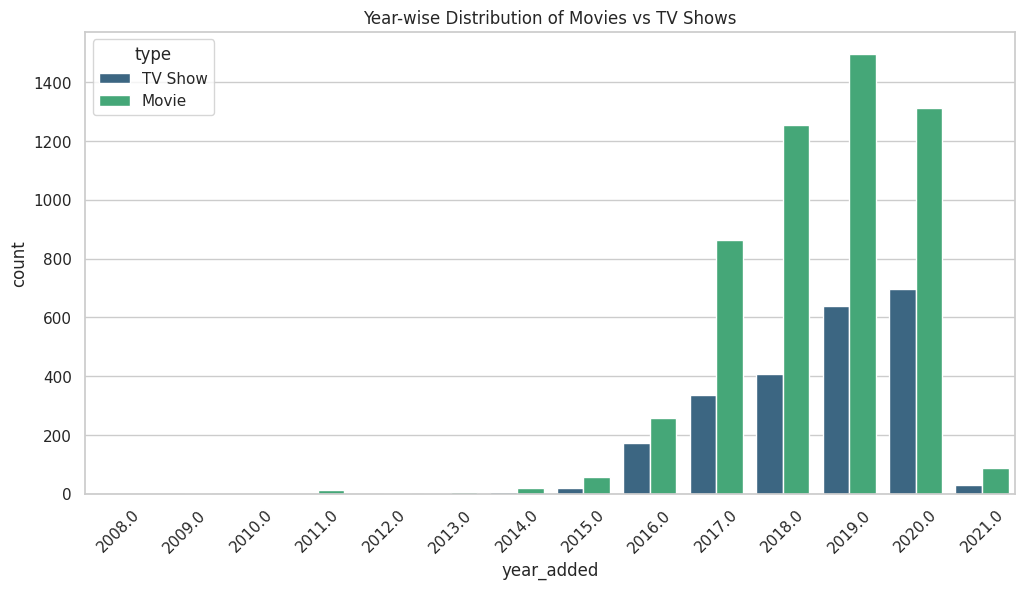

In [70]:
# Drop rows with missing year_added
df_plot = df.dropna(subset=['year_added'])

plt.figure(figsize=(12,6))
sns.countplot(data=df_plot, x='year_added', hue='type', palette='viridis')
plt.title("Year-wise Distribution of Movies vs TV Shows")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3529330314.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




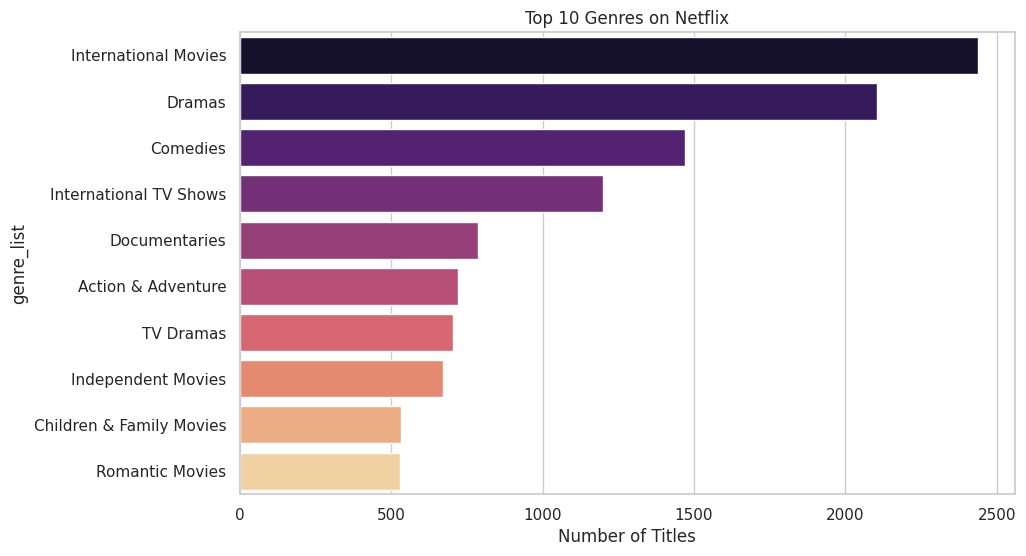

In [71]:
# Make a copy
df_genres = df.copy()

# Split genres using the correct column name 'Type'
df_genres['genre_list'] = df_genres['Type'].str.split(',')  # 'Type' contains genres

# Explode to separate rows
df_genres = df_genres.explode('genre_list')

# Remove extra spaces
df_genres['genre_list'] = df_genres['genre_list'].str.strip()

# Count top 10 genres
top_genres = df_genres['genre_list'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.show()


/tmp/ipython-input-1382153074.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




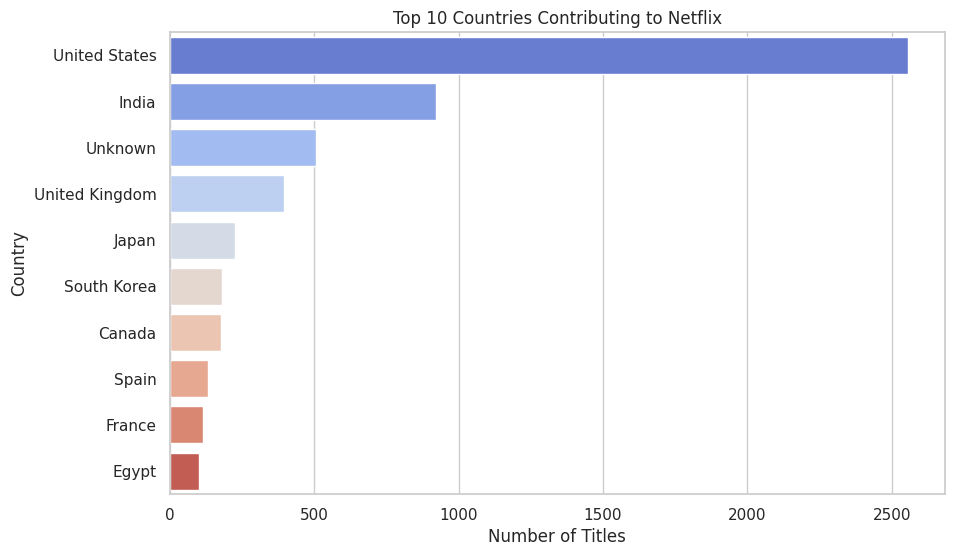

In [72]:
# Top 10 countries contributing content
top_countries = df['Country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries Contributing to Netflix")
plt.xlabel("Number of Titles")
plt.show()


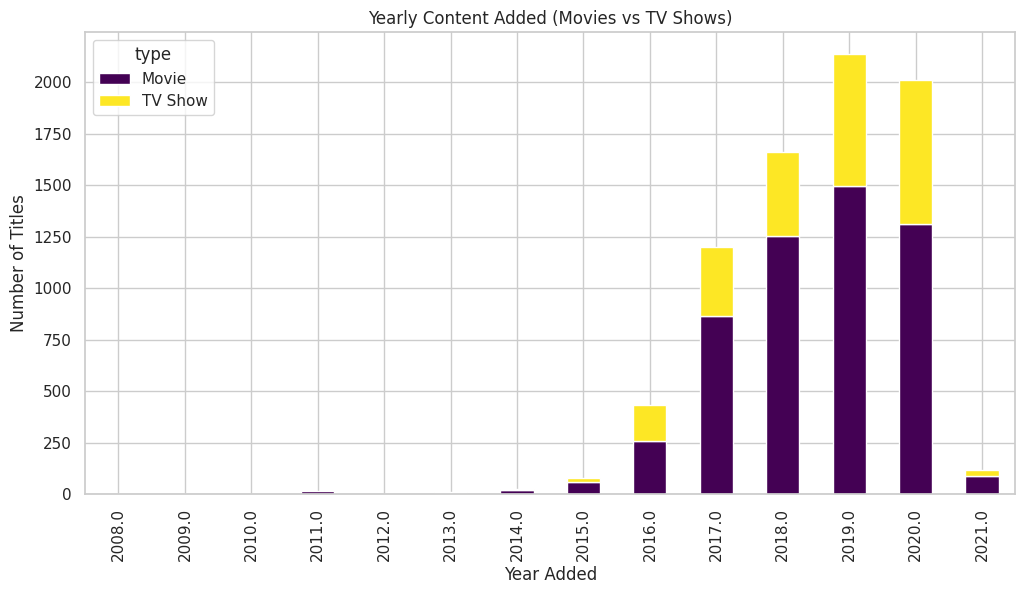

In [73]:
# Step 1: Ensure 'type' column exists
df.rename(columns={'Category': 'type'}, inplace=True)

# Step 2: Ensure 'year_added' column exists and drop NaNs
df['year_added'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
df_plot = df.dropna(subset=['year_added', 'type'])

# Step 3: Group and plot
yearly_content = df_plot.groupby(['year_added', 'type']).size().unstack(fill_value=0)

yearly_content.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Yearly Content Added (Movies vs TV Shows)")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


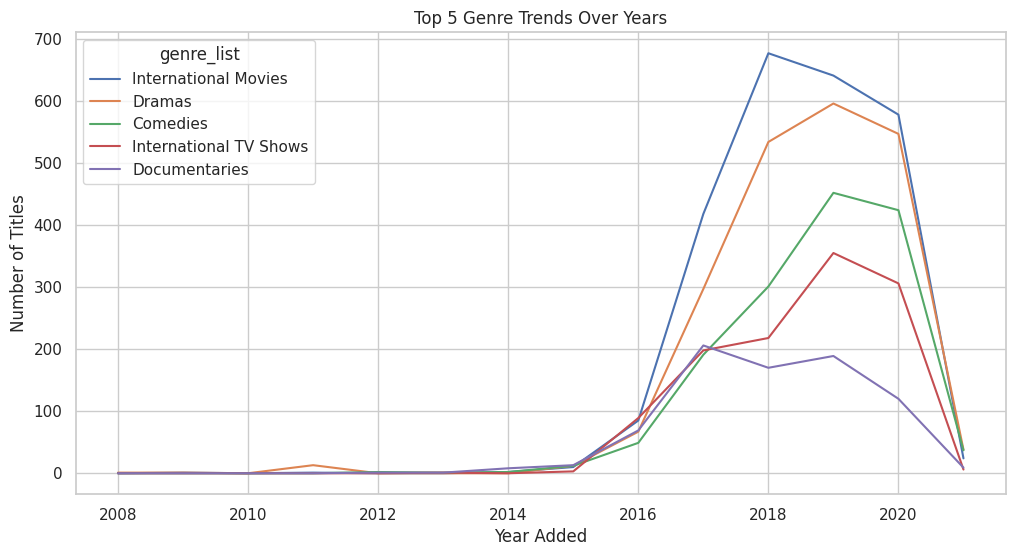

In [74]:
# Step 1: Ensure 'year_added' exists in df_genres
df_genres['year_added'] = pd.to_datetime(df_genres['Release_Date'], errors='coerce').dt.year

# Step 2: Drop rows with missing year or genre
df_genres_plot = df_genres.dropna(subset=['year_added', 'genre_list'])

# Step 3: Group by year and genre
genre_year = df_genres_plot.groupby(['year_added','genre_list']).size().unstack(fill_value=0)

# Step 4: Select top 5 genres overall
top_5_genres = genre_year.sum().sort_values(ascending=False).head(5).index

# Step 5: Plot trends
genre_year[top_5_genres].plot(figsize=(12,6))
plt.title("Top 5 Genre Trends Over Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


In [75]:
fig = px.bar(top_genres, x=top_genres.values, y=top_genres.index, orientation='h', title="Top 10 Genres")
fig.show()


In [76]:
df.to_csv("Netflix_Cleaned.csv", index=False)
files.download("Netflix_Cleaned.csv")  # Download to local system


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-701287706.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




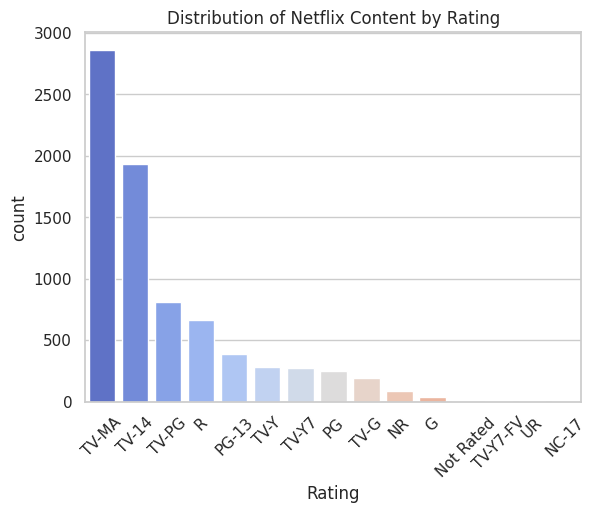

In [77]:
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Distribution of Netflix Content by Rating")
plt.show()


/tmp/ipython-input-1536404.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



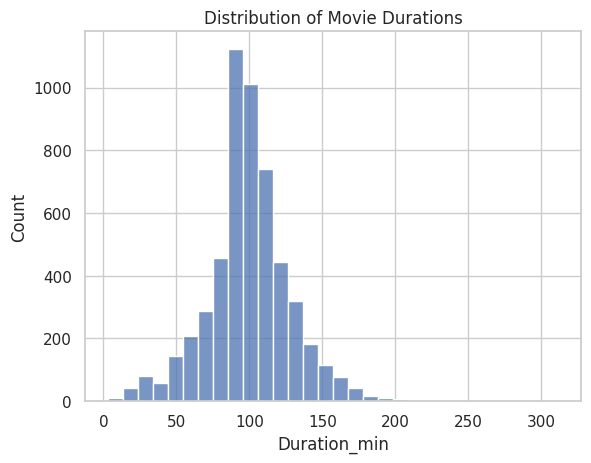

In [78]:
df_movies = df[df['type']=='Movie']
df_movies['Duration_min'] = df_movies['Duration'].str.replace(' min','').astype(float)
sns.histplot(df_movies['Duration_min'], bins=30)
plt.title("Distribution of Movie Durations")
plt.show()
